In [1]:
import numpy as np
import pandas as pd
from obspy import read
import matplotlib.pyplot as plt
import os
from scipy.signal import butter, lfilter
import features as ft
from scipy.signal import freqz
import datetime
from scipy.stats import norm
import re

In [3]:
# Path to the directory containing the data files
#paths = os.listdir("D:/Popocatepetl/processed_data/2023_05")
# paths = os.listdir("C://Users//javie//OneDrive - INSTITUTO TECNOLOGICO AUTONOMO DE MEXICO//MaestriaEnCienciaDeDatos//EstanciaDeInvestigacion//Popocatepelt//PopocatepetlVolcano//data") 
paths = os.listdir("C:/Users/LENOVO/OneDrive/Documentos/Estancia de Investigación/PopocatepetlVolcano/data/clean_data/2023_05")

In [ ]:
# Filter files for a specific month
#month = 'CN_PPPP_HHZ_2023_02'
month = ''
with_s = [x for x in paths if re.match(r'^{}'.format(month), x)]
with_s.sort()
print(with_s)

['CN_PPPP_HHZ_2023_02_01.seed', 'CN_PPPP_HHZ_2023_02_02.seed', 'CN_PPPP_HHZ_2023_02_03.seed', 'CN_PPPP_HHZ_2023_02_04.seed', 'CN_PPPP_HHZ_2023_02_05.seed', 'CN_PPPP_HHZ_2023_02_06.seed', 'CN_PPPP_HHZ_2023_02_07.seed', 'CN_PPPP_HHZ_2023_02_08.seed', 'CN_PPPP_HHZ_2023_02_09.seed', 'CN_PPPP_HHZ_2023_02_10.seed', 'CN_PPPP_HHZ_2023_02_11.seed', 'CN_PPPP_HHZ_2023_02_12.seed', 'CN_PPPP_HHZ_2023_02_13.seed', 'CN_PPPP_HHZ_2023_02_14.seed', 'CN_PPPP_HHZ_2023_02_15.seed', 'CN_PPPP_HHZ_2023_02_16.seed', 'CN_PPPP_HHZ_2023_02_17.seed', 'CN_PPPP_HHZ_2023_02_18.seed', 'CN_PPPP_HHZ_2023_02_19.seed', 'CN_PPPP_HHZ_2023_02_20.seed', 'CN_PPPP_HHZ_2023_02_21.seed', 'CN_PPPP_HHZ_2023_02_22.seed', 'CN_PPPP_HHZ_2023_02_23.seed', 'CN_PPPP_HHZ_2023_02_24.seed', 'CN_PPPP_HHZ_2023_02_25.seed', 'CN_PPPP_HHZ_2023_02_26.seed', 'CN_PPPP_HHZ_2023_02_27.seed', 'CN_PPPP_HHZ_2023_02_28.seed']


In [56]:
#source_path = "D:/Popocatepetl/processed_data/2023/"
source_path = "C:/Users/LENOVO/OneDrive/Documentos/Estancia de Investigación/PopocatepetlVolcano/data/clean_data/2023_05/"

In [65]:
# Test the features in the range of 0.7 to 30 Hz
min_freq = 0.7
max_freq = 30
features_df = pd.DataFrame(columns=["timestamp", "energy", "kurtosis", "frecuency_index", "entropy"])
for file in with_s:
    print(file)
    [filtered_signal, s_low, s_high] = ft.load_and_preprocess_seismic_data(source_path+file, freqmin=min_freq, freqmax=max_freq, low_freqmin=1, low_freqmax=4, high_freqmin=4, high_freqmax=9)
    day_df = ft.calculate_features(filtered_signal[0], s_low[0], s_high[0], window_size_seconds=600, overlap=0.5)
    features_df = pd.concat([features_df, day_df], ignore_index=True)

CN_PPPP_HHZ_2023_02_01.seed


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30572\76544449.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  features_df = pd.concat([features_df, day_df], ignore_index=True)


CN_PPPP_HHZ_2023_02_02.seed
CN_PPPP_HHZ_2023_02_03.seed
CN_PPPP_HHZ_2023_02_04.seed
CN_PPPP_HHZ_2023_02_05.seed
CN_PPPP_HHZ_2023_02_06.seed
CN_PPPP_HHZ_2023_02_07.seed
CN_PPPP_HHZ_2023_02_08.seed
CN_PPPP_HHZ_2023_02_09.seed
CN_PPPP_HHZ_2023_02_10.seed
CN_PPPP_HHZ_2023_02_11.seed
CN_PPPP_HHZ_2023_02_12.seed
CN_PPPP_HHZ_2023_02_13.seed
CN_PPPP_HHZ_2023_02_14.seed
CN_PPPP_HHZ_2023_02_15.seed
CN_PPPP_HHZ_2023_02_16.seed
CN_PPPP_HHZ_2023_02_17.seed
CN_PPPP_HHZ_2023_02_18.seed
CN_PPPP_HHZ_2023_02_19.seed
CN_PPPP_HHZ_2023_02_20.seed
CN_PPPP_HHZ_2023_02_21.seed
CN_PPPP_HHZ_2023_02_22.seed
CN_PPPP_HHZ_2023_02_23.seed
CN_PPPP_HHZ_2023_02_24.seed
CN_PPPP_HHZ_2023_02_25.seed
CN_PPPP_HHZ_2023_02_26.seed
CN_PPPP_HHZ_2023_02_27.seed
CN_PPPP_HHZ_2023_02_28.seed


## Energía

In [66]:
features_df['energy_movil_media'] = features_df['energy'].rolling(window=12, center=True).mean()
#features_df['energy_movil_mediana'] = features_df['energy'].rolling(window=12, center=True).median()

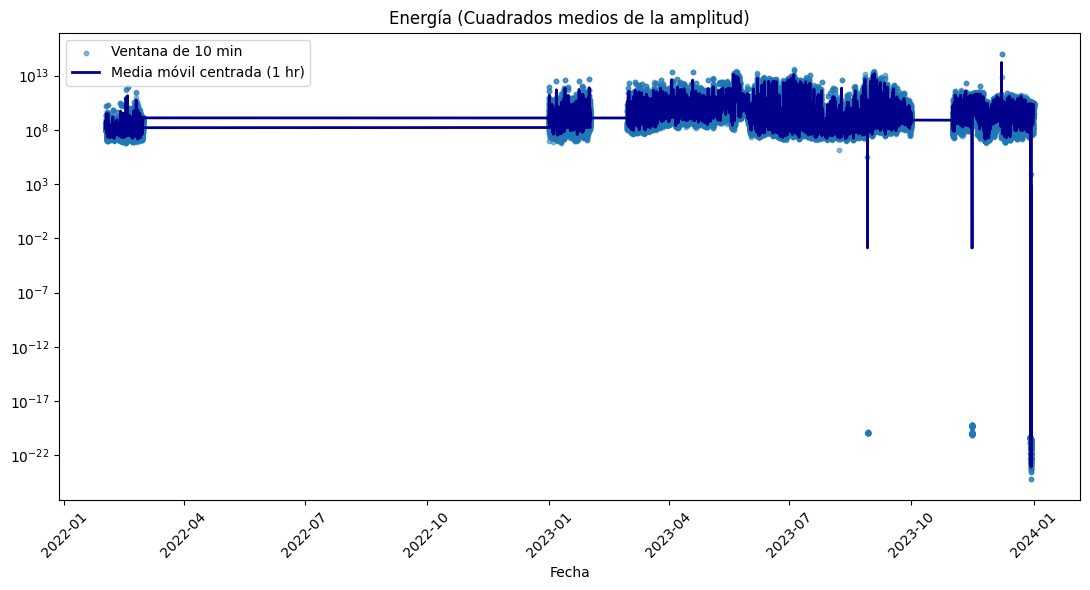

In [63]:
# Plot the statistical features in separate figures as dot plots
fig1, ax1 = plt.subplots(figsize=(11, 6))
ax1.scatter(features_df['timestamp'], features_df['energy'], color='tab:blue', s=10, alpha=0.5, label = "Ventana de 10 min")
# Media móvil centrada
ax1.plot(features_df['timestamp'], features_df['energy_movil_media'], color='darkblue', alpha = 1,linewidth=2, label='Media móvil centrada (1 hr)')
# Mediana móvil centrada
#ax1.plot(features_df['timestamp'], features_df['energy_movil_mediana'], color='tab:green', linewidth=2, label='Mediana móvil centrada (1 hr)')
ax1.set_yscale('log')  # Set vertical axis to logarithmic scale
ax1.set_title('Energía (Cuadrados medios de la amplitud)')
ax1.set_xlabel('Fecha')
ax1.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
#fig1.savefig(r"C:\Users\javie\OneDrive - INSTITUTO TECNOLOGICO AUTONOMO DE MEXICO\MaestriaEnCienciaDeDatos\EstanciaDeInvestigacion\Popocatepelt\PopocatepetlVolcano\img\ReporteEstancia\Energy_may.pdf", bbox_inches="tight", dpi=300)
#plt.close(fig1)

In [48]:
# Opción 4: Verde agua + Verde oscuro (monocromático alternativo)
fig1, ax1 = plt.subplots(figsize=(11, 6))
ax1.scatter(features_df['timestamp'], features_df['energy'], color='paleturquoise', s=10, alpha=0.6, label="Ventana de 10 min")
ax1.plot(features_df['timestamp'], features_df['energy_movil_media'], color='teal', linewidth=2, label='Media móvil centrada (1 hr)')
ax1.set_yscale('log')
ax1.set_title('Energía (Cuadrados medios de la amplitud)')
ax1.set_xlabel('Fecha')
ax1.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
fig1.savefig(r"C:/Users/LENOVO/OneDrive/Documentos/Estancia de Investigación/PopocatepetlVolcano/img/Energy_may_media.pdf", bbox_inches="tight", dpi=300)
plt.close(fig1)

In [67]:
features_df['kurtosis_movil_media'] = features_df['kurtosis'].rolling(window=12, center=True).mean()

In [49]:

fig2, ax2 = plt.subplots(figsize=(11, 6))
ax2.scatter(features_df['timestamp'], features_df['kurtosis'], color='lightsteelblue', s=10, alpha=0.5, label = "Ventana de 10 min")
ax2.plot(features_df['timestamp'], features_df['kurtosis_movil_media'], color='navy', alpha = 1,linewidth=2, label='Media móvil centrada (1 hr)')
ax2.set_title('Kurtosis')
ax2.set_xlabel('Fecha')
ax2.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
fig2.savefig(r"C:/Users/LENOVO/OneDrive/Documentos/Estancia de Investigación/PopocatepetlVolcano/img/Kurtosis_may_media.pdf", bbox_inches="tight", dpi=300)
plt.close(fig2)


In [68]:
features_df['frequency_index_movil_media'] = features_df['frequency_index'].rolling(window=12, center=True).mean()

In [50]:
fig3, ax3 = plt.subplots(figsize=(11, 6))
ax3.scatter(features_df['timestamp'], features_df['frequency_index'], color='#7FB3D5', s=10, alpha=0.5, label = "Ventana de 10 min")
ax3.plot(features_df['timestamp'], features_df['frequency_index_movil_media'], color='#C0392B', alpha = 1,linewidth=2, label='Media móvil centrada (1 hr)')
ax3.set_title('Índice de frecuencia')
ax3.set_xlabel('Fecha')
ax3.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
fig3.savefig(r"C:/Users/LENOVO/OneDrive/Documentos/Estancia de Investigación/PopocatepetlVolcano/img/Frequency_index_may_media.pdf", bbox_inches="tight", dpi=300)
plt.close(fig3)

In [69]:
features_df['entropy_movil_media'] = features_df['entropy'].rolling(window=12, center=True).mean()

In [51]:
fig4, ax4 = plt.subplots(figsize=(11, 6))
ax4.scatter(features_df['timestamp'], features_df['entropy'], color='silver', s=10, alpha=0.5, label = "Ventana de 10 min")
ax4.plot(features_df['timestamp'], features_df['entropy_movil_media'], color='darkorange', alpha = 1,linewidth=2, label='Media móvil centrada (1 hr)')
ax4.set_title('Entropia')
ax4.set_xlabel('Fecha')
ax4.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
fig4.savefig(r"C:/Users/LENOVO/OneDrive/Documentos/Estancia de Investigación/PopocatepetlVolcano/img/Entropy_may_media.pdf", bbox_inches="tight", dpi=300)
plt.close(fig4)

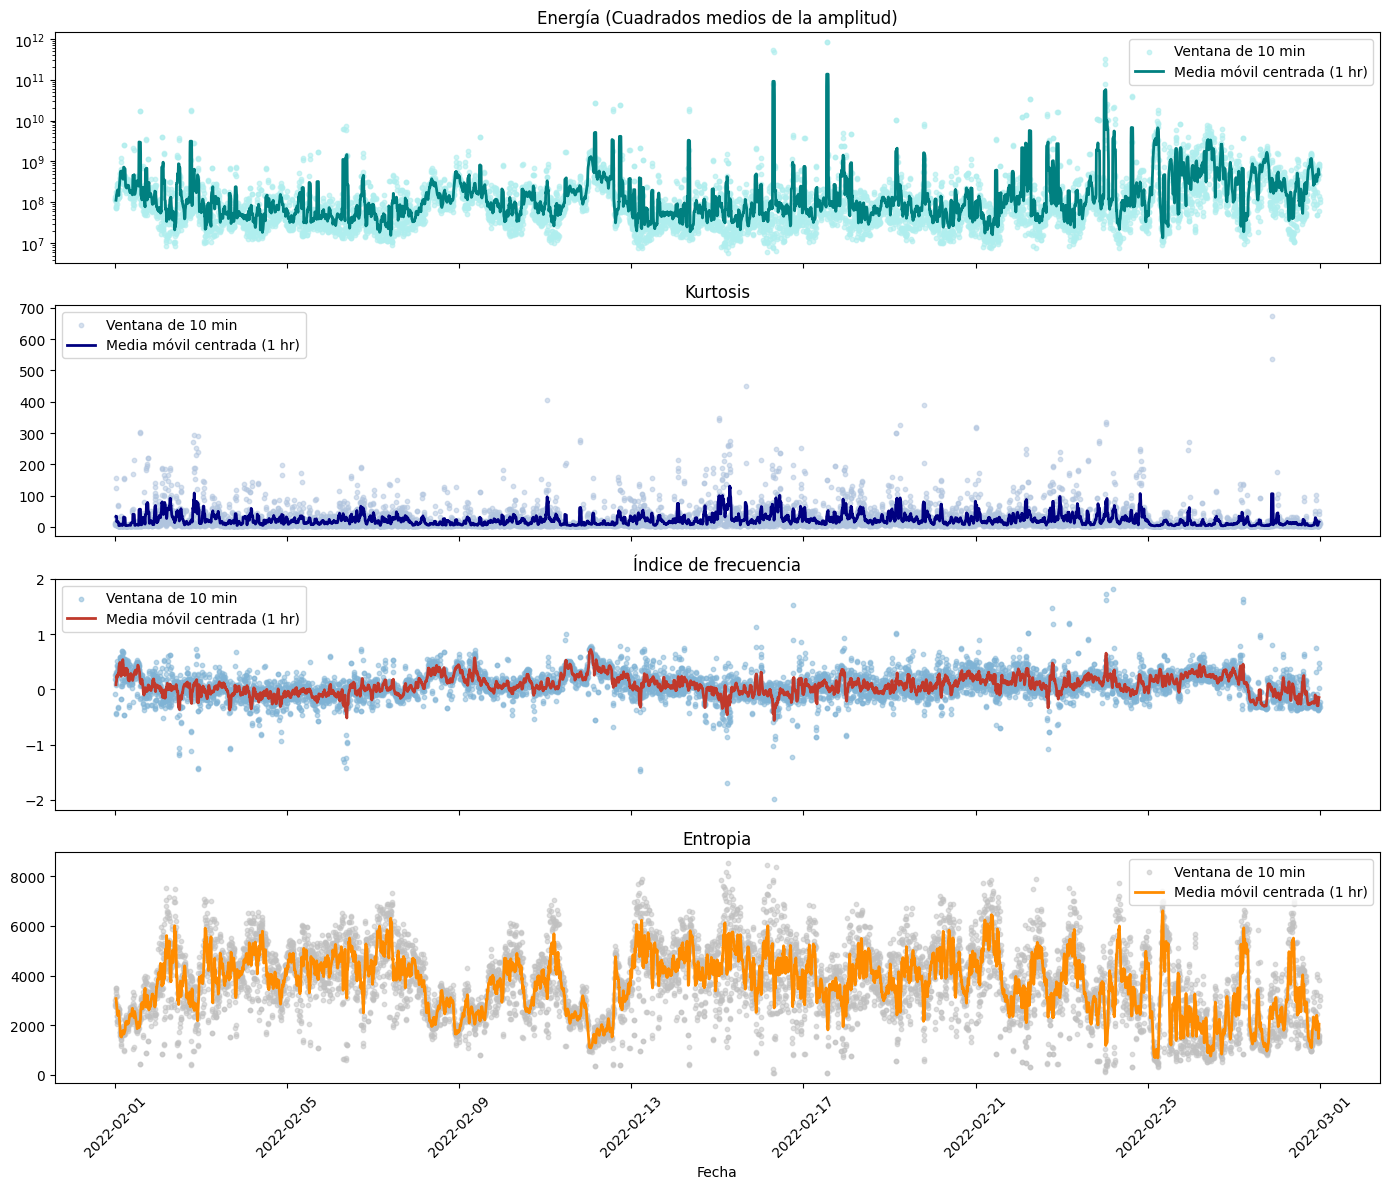

In [70]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 12), sharex=True)
axes[0].scatter(features_df['timestamp'], features_df['energy'], color='paleturquoise', s=10, alpha=0.6, label="Ventana de 10 min")
axes[0].plot(features_df['timestamp'], features_df['energy_movil_media'], color='teal', linewidth=2, label='Media móvil centrada (1 hr)')
axes[0].set_yscale('log')
axes[0].set_title('Energía (Cuadrados medios de la amplitud)')
axes[0].legend(loc='best')

axes[1].scatter(features_df['timestamp'], features_df['kurtosis'], color='lightsteelblue', s=10, alpha=0.5, label = "Ventana de 10 min")
axes[1].plot(features_df['timestamp'], features_df['kurtosis_movil_media'], color='navy', alpha = 1,linewidth=2, label='Media móvil centrada (1 hr)')
axes[1].set_title('Kurtosis')
axes[1].legend(loc='best')

axes[2].scatter(features_df['timestamp'], features_df['frequency_index'], color='#7FB3D5', s=10, alpha=0.5, label = "Ventana de 10 min")
axes[2].plot(features_df['timestamp'], features_df['frequency_index_movil_media'], color='#C0392B', alpha = 1,linewidth=2, label='Media móvil centrada (1 hr)')
axes[2].set_title('Índice de frecuencia')
axes[2].legend(loc='best')

axes[3].scatter(features_df['timestamp'], features_df['entropy'], color='silver', s=10, alpha=0.5, label = "Ventana de 10 min")
axes[3].plot(features_df['timestamp'], features_df['entropy_movil_media'], color='darkorange', alpha = 1,linewidth=2, label='Media móvil centrada (1 hr)')
axes[3].set_title('Entropia')
axes[3].set_xlabel('Fecha')
axes[3].legend(loc='best')

plt.xticks(rotation=45)
plt.tight_layout()

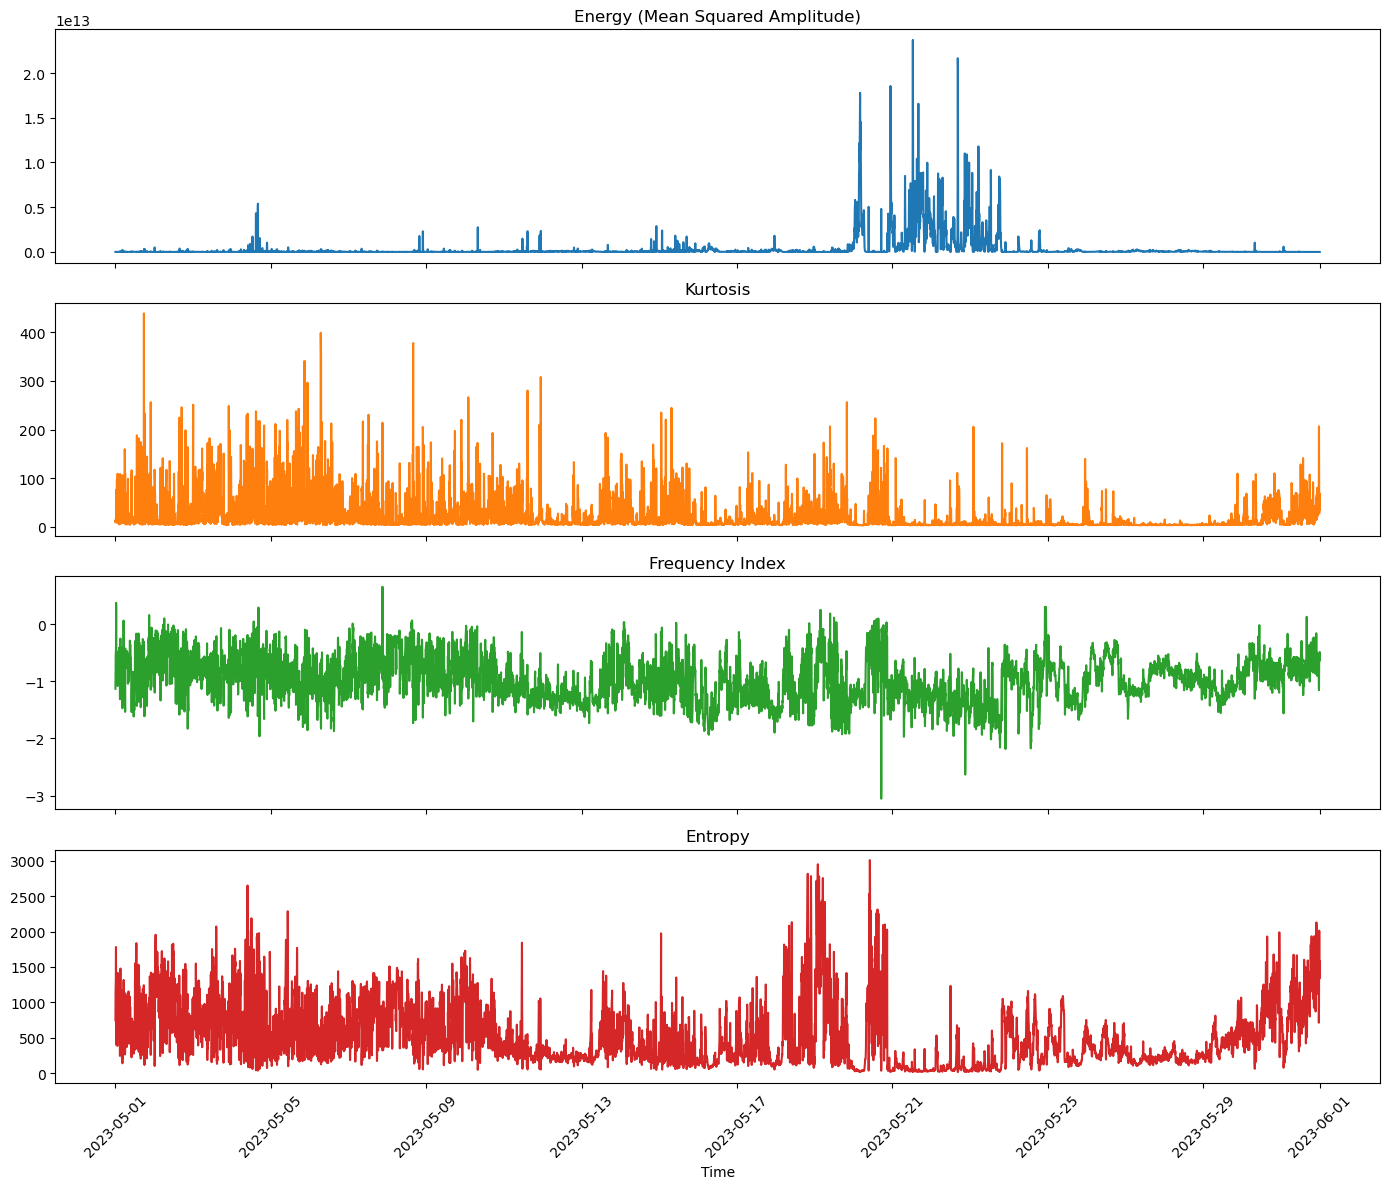

In [ ]:
"""
# Plot all four statistical features in separate subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 12), sharex=True)


axes[0].plot(features_df['timestamp'], features_df['energy'], color='tab:blue')
axes[0].set_title('Energy (Mean Squared Amplitude)')

axes[1].plot(features_df['timestamp'], features_df['kurtosis'], color='tab:orange')
axes[1].set_title('Kurtosis')

axes[2].plot(features_df['timestamp'], features_df['frequency_index'], color='tab:green')
axes[2].set_title('Frequency Index')

axes[3].plot(features_df['timestamp'], features_df['entropy'], color='tab:red')
axes[3].set_title('Entropy')
axes[3].set_xlabel('Time')

plt.xticks(rotation=45)
plt.tight_layout()
"""

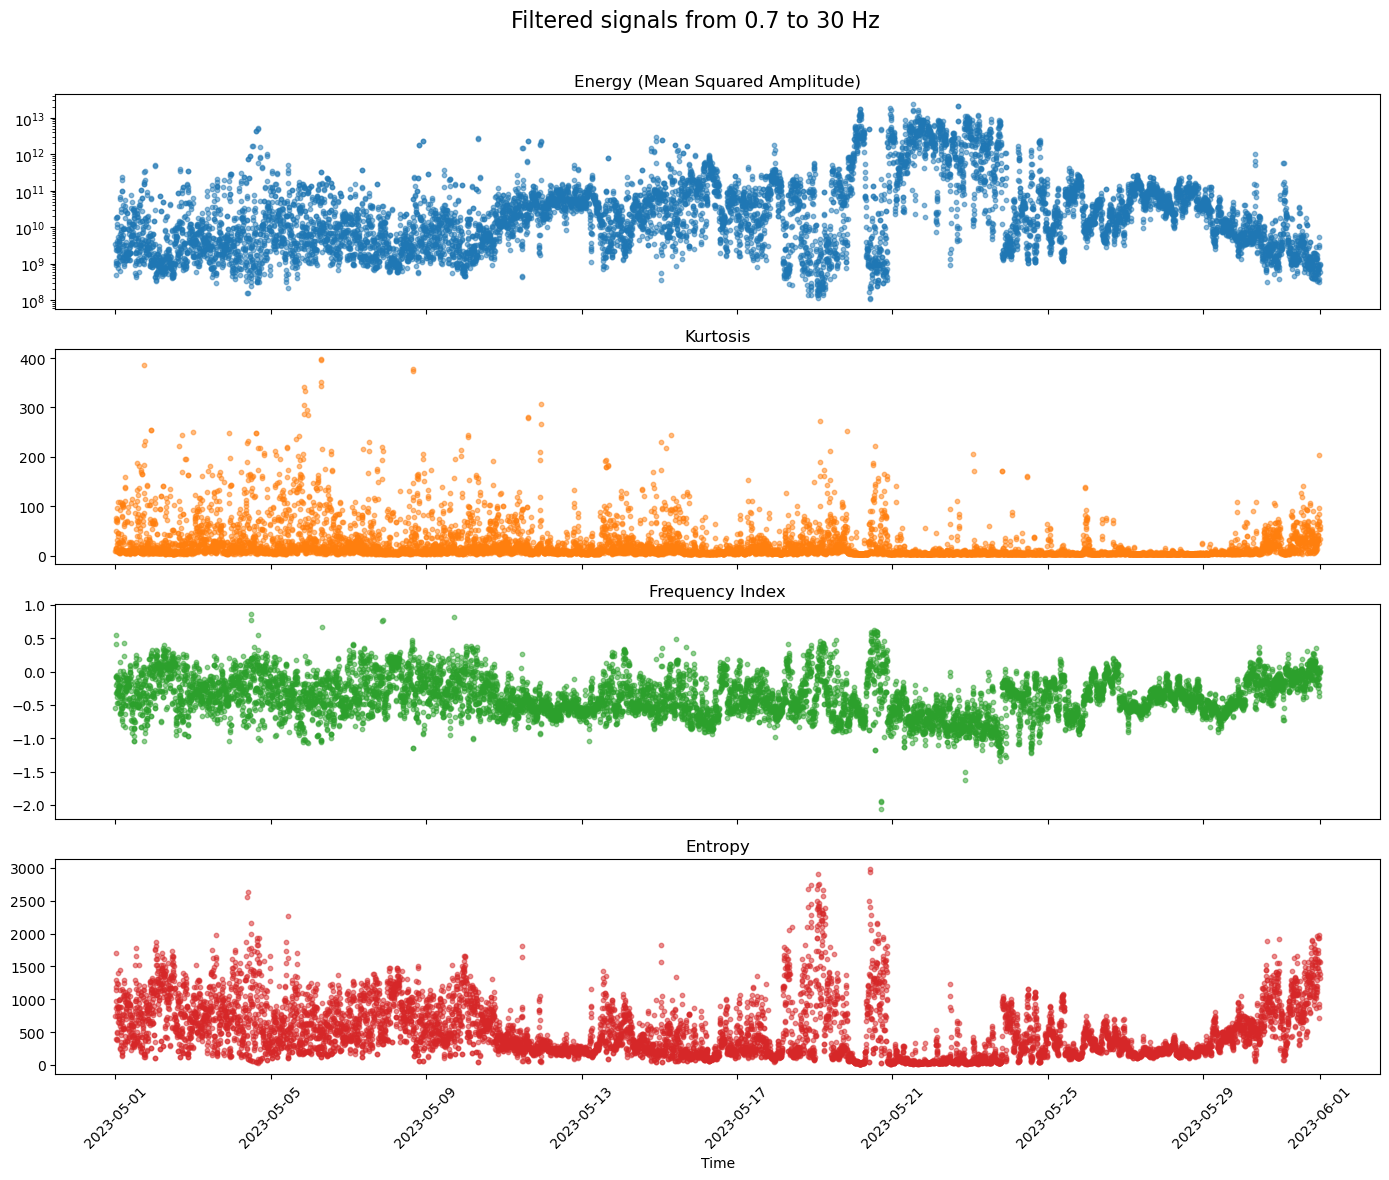

In [32]:
# Plot the statistical features in separate subplots as dot plots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 12), sharex=True)
fig.suptitle(f'Filtered signals from {min_freq} to {max_freq} Hz', fontsize=16)

axes[0].scatter(features_df['timestamp'], features_df['energy'], color='tab:blue', s=10, alpha=0.5)
axes[0].set_yscale('log')  # Set vertical axis to logarithmic scale
axes[0].set_title('Energy (Mean Squared Amplitude)')

axes[1].scatter(features_df['timestamp'], features_df['kurtosis'], color='tab:orange', s=10, alpha=0.5)
axes[1].set_title('Kurtosis')

axes[2].scatter(features_df['timestamp'], features_df['frequency_index'], color='tab:green', s=10, alpha=0.5)
axes[2].set_title('Frequency Index')

axes[3].scatter(features_df['timestamp'], features_df['entropy'], color='tab:red', s=10, alpha=0.5)
axes[3].set_title('Entropy')
axes[3].set_xlabel('Time')

plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0, 1, 0.97])